# 1- Load the CarPrice_Prediction.csv data set and perform the following steps: 

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [2]:
dataset = pd.read_csv('CarPrice_Prediction.csv')
dataset.head()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


car_ID              0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64
Empty DataFrame
Columns: [car_ID, wheelbase, carlength, carwidth, carheight, curbweight, enginesize, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []


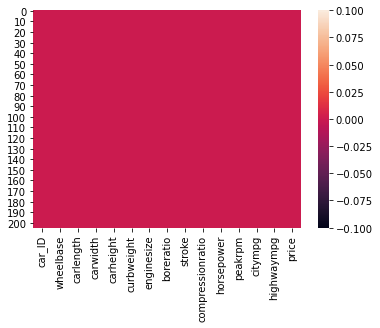

In [3]:
#a)- Identifying the missed data for each feature
miss = dataset.isna().sum() 
sns.heatmap(dataset.isna())
print(miss)
print(dataset[dataset.isnull().T.any()])

In [4]:
#b)Data cleaning if data is missed. In this case, you can remove the subjects with missed values.
dataset.dropna(axis=0,inplace= True)

In [5]:
# c) Plot the correlation matrix among all variables
corr = dataset.corr()
corr

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
wheelbase,0.129729,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.150276,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


<AxesSubplot:>

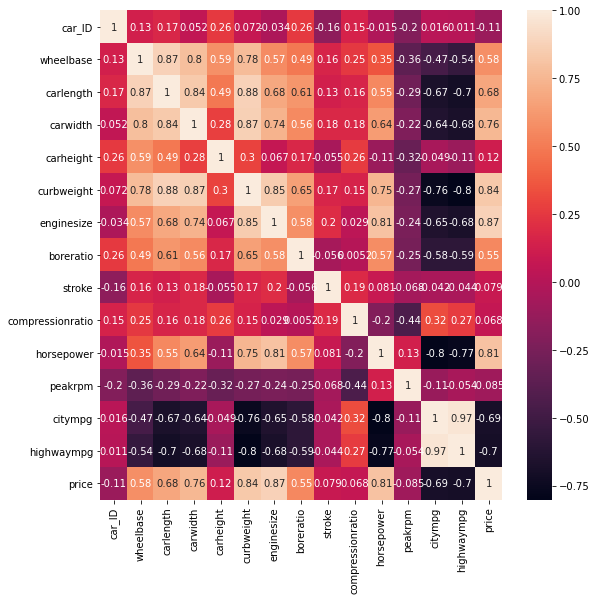

In [6]:
plt.figure(figsize=(9,9))
sns.heatmap(corr,annot=True)

In [7]:
# d) Use 90% data as training and 10% test.
X = dataset.drop(['price','car_ID'],axis = 1)
y = dataset['price']
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size = 0.1)
train, test = train_test_split(dataset, test_size=0.1)

In [8]:
# e) Data scaling, using “standardization” function. 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

In [9]:
# f) Determine the dimensionality of data for test and train sets
print("Dimension of train dataset:", train.shape)
print("Dimension of test dataset:", test.shape)
print('Dimension of X_train :',X_train.shape)
print('Dimension of X_test :', X_test.shape)
print('Dimension of y_train :',y_train.shape)
print('Dimension of y_test :', y_test.shape)

Dimension of train dataset: (184, 15)
Dimension of test dataset: (21, 15)
Dimension of X_train : (184, 13)
Dimension of X_test : (21, 13)
Dimension of y_train : (184,)
Dimension of y_test : (21,)


In [10]:
# g) Using a random forest regression model (default settings), compute the prediction accuracy on training and test sets (R2, MAE, MSE). Plot the regression lines for predicted values vs. real values and histogram of predicted values vs. real values.
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 10 decision trees
rf = RandomForestRegressor(n_estimators = 10)
# Train the model on training data
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
diff_Train = pd.DataFrame({'Actual value': y_train, 'Predicted value': y_pred_train})
print(diff_Train.head())
print ('R Squared_Train =',r2_score(y_train, y_pred_train))
print ('MAE_Train =',mean_absolute_error(y_train, y_pred_train))
print ('MSE_Train =',mean_squared_error(y_train, y_pred_train))

     Actual value  Predicted value
173        8948.0      9132.700000
181       15750.0     15726.000000
197       16515.0     15121.500000
0         13495.0     15498.333333
157        7198.0      7396.000000
R Squared_Train = 0.9828019145881557
MAE_Train = 688.0871376811593
MSE_Train = 1071532.7792741847


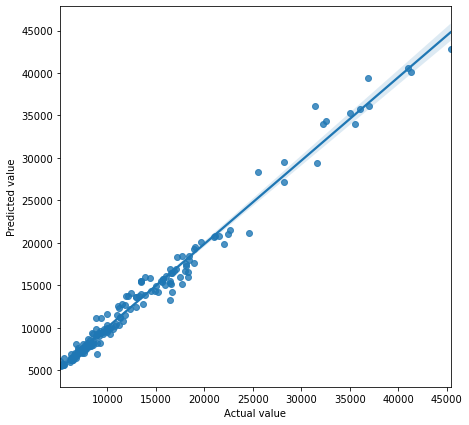

In [11]:
# plot
plt.figure(figsize=(7,7))
sns.regplot(x=diff_Train['Actual value'], y=diff_Train['Predicted value'])
plt.show()

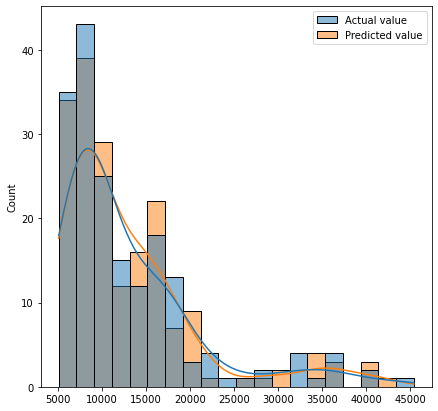

In [12]:
# Relationship between real values and predicted values based on histogram
plt.figure(figsize=(7,7))
sns.histplot(data=diff_Train,bins=20,kde=True)
plt.show()

In [13]:
# Predict unsen data (test set)
y_pred = rf.predict(X_test)
diff_Test = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
diff_Test.head()
print ('R Squared =',r2_score(y_test, y_pred))
print ('MAE =',mean_absolute_error(y_test, y_pred))
print ('MSE =',mean_squared_error(y_test, y_pred))

R Squared = 0.8653037670627215
MAE = 2000.3865238095234
MSE = 8994957.139123285


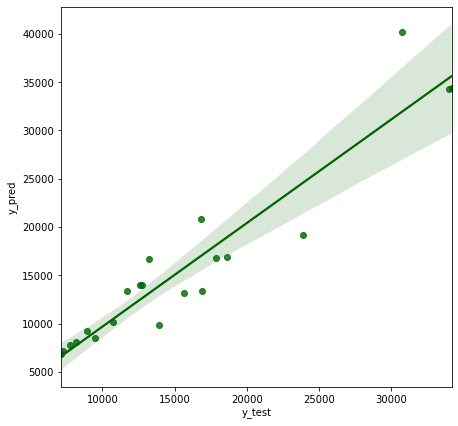

In [14]:
# plot
plt.figure(figsize=(7,7))
sns.regplot(x=y_test, y=y_pred, color = 'darkgreen')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

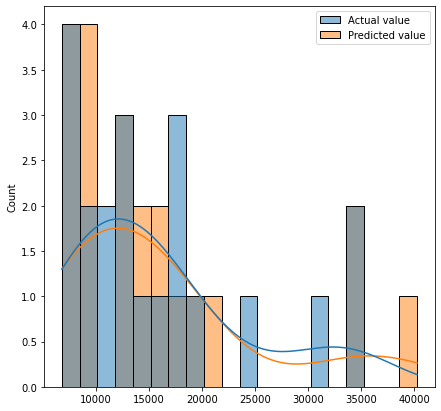

In [15]:
# Relationship between real values and predicted values based on histogram
plt.figure(figsize=(7,7))
sns.histplot(data=diff_Test,bins=20,kde=True)
plt.show()

# h) Is there any overfiring on this prediction model? 
YES.
Overfitting in Machine Learning Overfitting refers to a model that models the training data too well.R2 on train is higher than it on test,and MSE and MAE on train is lower than on test ,so I think there is some overfiring on this prediction model.

In [16]:
# i) Change “n_estimators” from 25 to 1000 (step size 25) and analyse the response of prediction model for underfitting and overfitting issues.
values = [i for i in range(25, 1000,25)]
train_scores, test_scores = list(), list()
for i in values:
	# configure the model
    model = RandomForestRegressor(n_estimators=i)
	# fit model on the training dataset
    model.fit(X_train, y_train)
	# evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_R2 = r2_score(y_train, train_yhat)
    train_scores.append(train_R2)
	# evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_R2 = r2_score(y_test, test_yhat)
    test_scores.append(test_R2)
	# summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_R2, test_R2))

>25, train: 0.989, test: 0.903
>50, train: 0.990, test: 0.895
>75, train: 0.990, test: 0.886
>100, train: 0.990, test: 0.890
>125, train: 0.990, test: 0.891
>150, train: 0.989, test: 0.889
>175, train: 0.990, test: 0.894
>200, train: 0.989, test: 0.887
>225, train: 0.990, test: 0.887
>250, train: 0.990, test: 0.893
>275, train: 0.990, test: 0.896
>300, train: 0.990, test: 0.892
>325, train: 0.989, test: 0.893
>350, train: 0.990, test: 0.891
>375, train: 0.990, test: 0.892
>400, train: 0.990, test: 0.894
>425, train: 0.990, test: 0.892
>450, train: 0.990, test: 0.890
>475, train: 0.990, test: 0.888
>500, train: 0.990, test: 0.889
>525, train: 0.990, test: 0.889
>550, train: 0.990, test: 0.886
>575, train: 0.990, test: 0.889
>600, train: 0.990, test: 0.891
>625, train: 0.990, test: 0.889
>650, train: 0.990, test: 0.890
>675, train: 0.990, test: 0.893
>700, train: 0.990, test: 0.894
>725, train: 0.990, test: 0.893
>750, train: 0.990, test: 0.892
>775, train: 0.990, test: 0.893
>800, train

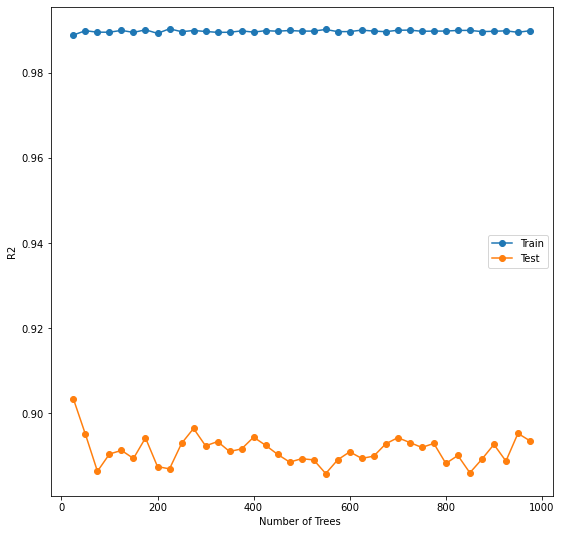

In [17]:
# plot of train and test scores vs tree depth
from matplotlib import pyplot
plt.figure(figsize=(9,9))
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.xlabel("Number of Trees ")
pyplot.ylabel("R2")
pyplot.show()

In [18]:
#j) What is your suggestion to select the optimal “estimators” for this prediction model? Why

max_value = max(test_scores)
print('Maximum value:', max_value, "At index:", test_scores.index(max_value))
num = (test_scores.index(max(test_scores))+1)*25
print("I suggest to choose",num,"as estimators")

Maximum value: 0.9033227131103182 At index: 0
I suggest to choose 25 as estimators


# 2- In this part we are going to identify the most important features using three different procedures

In [19]:
# a) Use 90% data as training and 10% test.
dataset = pd.read_csv('CarPrice_Prediction.csv')
X = dataset.drop(['price','car_ID'],axis = 1)
y = dataset['price']
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size = 0.1)
train, test = train_test_split(dataset, test_size=0.1)

In [20]:
# b) Data scaling, using “standardization” function.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

In [301]:
# c) Plot the correlation matrix among training features.
train_features=dataset.iloc[:, 1:-1]
Corr1=train_features.corr()
Corr1

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544


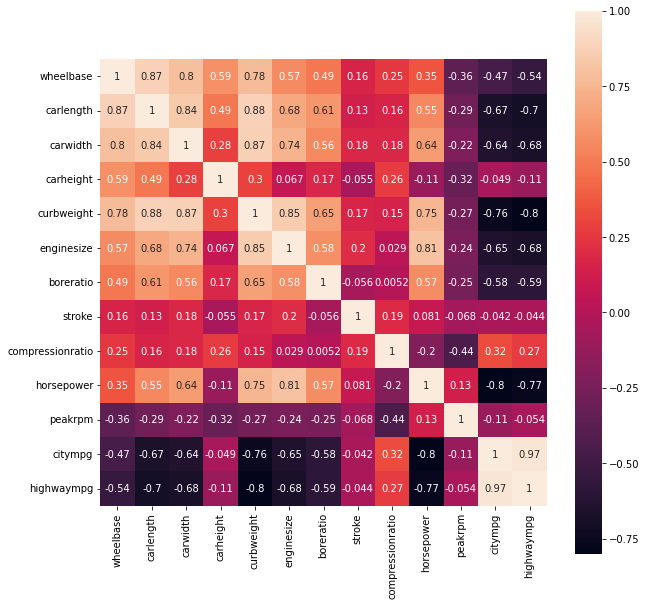

In [302]:
plt.figure(figsize=(10,10))
sns.heatmap(Corr1, annot=True,square=True) 
plt.show()

In [303]:
# d) Sort the features based on correlation values between each feature and target.
dataset = dataset.iloc[:, 1:]#drop car_id
corr = dataset.corr()
corr_sort=corr["price"].sort_values(ascending = False).drop("price")
corr_sort_feature = pd.DataFrame(corr_sort)
corr_sort_feature = corr_sort_feature.reset_index(drop=False)
corr_sort_feature 

,index,price
0,enginesize,0.874145
1,curbweight,0.835305
2,horsepower,0.808139
3,carwidth,0.759325
4,carlength,0.682920
5,wheelbase,0.577816
6,boreratio,0.553173
7,carheight,0.119336
8,stroke,0.079443
9,compressionratio,0.067984


In [304]:
# e) Sort the features based on a linear regression algorithm.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model

LinearRegression()

In [305]:
coeff_df_linear = pd.DataFrame(model.coef_,X.columns,columns=['Cofficient'])
coeff_df_linear= coeff_df_linear.reset_index(drop=False)
coeff_df_linear = coeff_df_linear.sort_values(by="Cofficient",ascending = False)
coeff_df_linear= coeff_df_linear.reset_index(drop=True)
coeff_df_linear

,index,Cofficient
0,enginesize,4881.928309
1,carwidth,1395.213498
2,curbweight,1266.256943
3,peakrpm,1244.617100
4,compressionratio,1218.641186
5,highwaympg,1179.554809
6,horsepower,1078.091808
7,wheelbase,676.474316
8,carheight,559.082075
9,boreratio,-58.585944


In [306]:
# f) Sort the features based on a random forest algorithm.
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

In [307]:
features= dataset.drop('price', axis = 1)
feature_list = list(features.columns)
features = np.array(features)
feature_importances = pd.DataFrame({"feature": feature_list, "importance": rf.feature_importances_}
                                  ).sort_values("importance", ascending=False)

feature_importances = feature_importances.reset_index(drop=True)
feature_importances

,feature,importance
0,enginesize,0.708330
1,highwaympg,0.126729
2,curbweight,0.104586
3,carwidth,0.010017
4,citympg,0.009729
5,horsepower,0.008529
6,wheelbase,0.006357
7,peakrpm,0.006171
8,compressionratio,0.005753
9,carlength,0.004977


In [308]:
# g) Show the sorted features based on three different methods in a table (Dataframe)
correlation = corr_sort_feature.iloc[:,:1]
correlation = correlation.rename(columns={'index': 'correlation'})
linear_regression = coeff_df_linear.iloc[:,:1]
linear_regression =linear_regression.rename(columns={'index': 'linear_regression'})
random_forest_fea = feature_importances.iloc[:,:1]
random_forest = random_forest_fea.rename(columns={'feature': 'random_forest'})
conact1 = pd.concat([correlation,linear_regression],axis=1,join="outer")
sorted_features=  pd.concat([conact1,random_forest],axis=1,join="outer")
sorted_features

,correlation,linear_regression,random_forest
0,enginesize,enginesize,enginesize
1,curbweight,carwidth,highwaympg
2,horsepower,curbweight,curbweight
3,carwidth,peakrpm,carwidth
4,carlength,compressionratio,citympg
5,wheelbase,highwaympg,horsepower
6,boreratio,horsepower,wheelbase
7,carheight,wheelbase,peakrpm
8,stroke,carheight,compressionratio
9,compressionratio,boreratio,carlength


In [309]:
# k) Select the top 3 best features using random forest algorithm and make a prediction task toestimate the outputs on test set.

top_feat_list=[]
for i in range(3):
    top_feat_list.append(sorted_features.iloc[i,2])
top_features = dataset.loc[:,top_feat_list]
price = dataset.loc[:,"price"]
new_dataset = pd.concat([top_features,price],axis=1,join="outer")
new_dataset

,enginesize,highwaympg,curbweight,price
0,130,27,2548,13495.0
1,130,27,2548,16500.0
2,152,26,2823,16500.0
3,109,30,2337,13950.0
4,136,22,2824,17450.0
...,...,...,...,...
200,141,28,2952,16845.0
201,141,25,3049,19045.0
202,173,23,3012,21485.0
203,145,27,3217,22470.0


In [310]:
X = new_dataset.drop(['price'],axis = 1)
y = new_dataset['price']
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size = 0.25)
train, test = train_test_split(dataset, test_size=0.1)

In [311]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

In [312]:
print("Dimension of train dataset:", train.shape)
print("Dimension of test dataset:", test.shape)
print('Dimension of X_train :',X_train.shape)
print('Dimension of X_test :', X_test.shape)
print('Dimension of y_train :',y_train.shape)
print('Dimension of y_test :', y_test.shape)

Dimension of train dataset: (184, 14)
Dimension of test dataset: (21, 14)
Dimension of X_train : (153, 3)
Dimension of X_test : (52, 3)
Dimension of y_train : (153,)
Dimension of y_test : (52,)


In [313]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 10 decision trees
rf = RandomForestRegressor(n_estimators = 10)
# Train the model on training data
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
diff_Train = pd.DataFrame({'Actual value': y_train, 'Predicted value': y_pred_train})
print(diff_Train.head())
print ('R Squared_Train =',r2_score(y_train, y_pred_train))
print ('MAE_Train =',mean_absolute_error(y_train, y_pred_train))
print ('MSE_Train =',mean_squared_error(y_train, y_pred_train))

     Actual value  Predicted value
191       13295.0          14752.5
163        8058.0           8046.8
116       17950.0          17309.9
164        8238.0           8105.9
46        11048.0          11789.3
R Squared_Train = 0.9710239961998405
MAE_Train = 798.138103267974
MSE_Train = 1641271.0125665944


# 3- Compare the reliability of KNN (k=3), linear regression, Random forest (n_estimators =100)and decision tree algorithms on the CarPrice_Prediction.csv data set using 10-fold cross-validation strategy. Plot the prediction performance (R2, MAE and MSE) among differentmodels. Which model have a better result on this dataset?

In [314]:
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score

dataset = pd.read_csv('CarPrice_Prediction.csv')
X= dataset.iloc[:,1:14].values# drop car ID
y=dataset.loc[:,"price"].values
# call the model
# model1 Random forest (n_estimators =100)
# model2 decision tree 
# model3 KNN (k=3)
# model4 linear regression
model_1 = RandomForestRegressor(n_estimators = 100)
model_2 = tree.DecisionTreeRegressor(max_depth=3)    
model_3 = neighbors.KNeighborsRegressor(n_neighbors=3)
model_4 = LinearRegression()

k = 10  # Number of folds 
kf = KFold(n_splits=k,shuffle=True, random_state=0)

R2_score1 = []
MAE_score1 = []
MSE_score1 = []

R2_score2 = []
MAE_score2 = []
MSE_score2 = []

R2_score3 = []
MAE_score3 = []
MSE_score3 = []

R2_score4 = []
MAE_score4 = []
MSE_score4 = []



for train_index , test_index in kf.split(X):
    X_train , X_test = X[train_index,:],X[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    ## Model 1    
    model_1.fit(X_train,y_train)
    pred_values1 = model_1.predict(X_test)
    r2_score1 = r2_score(pred_values1 , y_test)
    R2_score1.append(r2_score1)
    MAE1 = mean_absolute_error(y_test, pred_values1)
    MAE_score1.append(MAE1)
    MSE1 = mean_squared_error(y_test, pred_values1)
    MSE_score1.append(MSE1)
    
    ##Model 2
    model_2.fit(X_train,y_train)
    pred_values2 = model_2.predict(X_test)
    r2_score2 = r2_score(pred_values2 , y_test)
    R2_score2.append(r2_score2)
    MAE2 = mean_absolute_error(y_test, pred_values2)
    MAE_score2.append(MAE2)
    
    MSE2 = mean_squared_error(y_test, pred_values2)
    MSE_score2.append(MSE2)
    
    ## Model 3    
    model_3.fit(X_train,y_train)
    pred_values3 = model_3.predict(X_test)
    r2_score3 = r2_score(pred_values3 , y_test)
    R2_score3.append(r2_score3)
    MAE3 = mean_absolute_error(y_test, pred_values3)
    MAE_score3.append(MAE3)
    
    MSE3 = mean_squared_error(y_test, pred_values3)
    MSE_score3.append(MSE3)
    
    ## Model 4    
    model_4.fit(X_train,y_train)
    pred_values4 = model_4.predict(X_test)
    r2_score4 = r2_score(pred_values4 , y_test)
    R2_score4.append(r2_score4)
    MAE4 = mean_absolute_error(y_test, pred_values4)
    MAE_score4.append(MAE4)
    
    MSE4 = mean_squared_error(y_test, pred_values4)
    MSE_score4.append(MSE4)
    

In [315]:
# model1 Random forest (n_estimators =100)
# model2 decision tree 
# model3 KNN (k=3)
# model4 linear regression
print("----------------------R2---------------------------")
print("Average R2 Score of Random Forest: ", np.average(R2_score1)) 
print("Average R2 Score of Decision Tree: ", np.average(R2_score2))
print("Average R2 Score of KNN: ", np.average(R2_score3))
print("Average R2 Score of Linear Regression: ", np.average(R2_score4)) 
print("-----------------------MAE--------------------------")
print("Average MAE Score of Random Forest: ", np.average(MAE_score1)) 
print("Average MAE Score of Decision Tree: ", np.average(MAE_score2))
print("Average MAE Score of KNN: ", np.average(MAE_score3))
print("Average MAE Score of Linear Regression: ", np.average(MAE_score4)) 
print("-----------------------MSE--------------------------")
print("Average MSE Score of Random Forest: ", np.average(MSE_score1)) 
print("Average MSE Score of Decision Tree: ", np.average(MSE_score2))
print("Average MSE Score of KNN: ", np.average(MSE_score3))
print("Average MSE Score of Linear Regression ", np.average(MSE_score4)) 

----------------------R2---------------------------
Average R2 Score of Random Forest:  0.8927682388982519
Average R2 Score of Decision Tree:  0.8236335197106491
Average R2 Score of KNN:  0.7886849168158963
Average R2 Score of Linear Regression:  0.7561081213011598
-----------------------MAE--------------------------
Average MAE Score of Random Forest:  1449.046147025397
Average MAE Score of Decision Tree:  2096.2689563785875
Average MAE Score of KNN:  2036.5471136507938
Average MAE Score of Linear Regression:  2445.0350721631576
-----------------------MSE--------------------------
Average MSE Score of Random Forest:  4697545.334934039
Average MSE Score of Decision Tree:  8346735.806975973
Average MSE Score of KNN:  9754342.019179484
Average MSE Score of Linear Regression  11800831.607341671


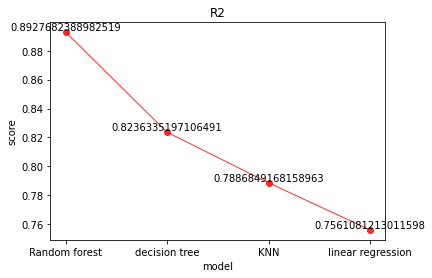

In [316]:
#plot
# model1 Random forest (n_estimators =100)
# model2 decision tree 
# model3 KNN (k=3)
# model4 linear regression
model = ["Random forest","decision tree","KNN","linear regression"]
R2_performance = [ np.average(R2_score1), np.average(R2_score2), np.average(R2_score3), np.average(R2_score4)]
MAE_performance = [np.average(MAE_score1),np.average(MAE_score2),np.average(MAE_score3),np.average(MAE_score4)]
MSE_performance = [np.average(MSE_score1),np.average(MSE_score2),np.average(MSE_score3),np.average(MSE_score4)]

plt.title('R2')  
plt.xlabel('model')  
plt.ylabel('score')
plt.plot(model, R2_performance, 'ro-', alpha=0.8, linewidth=1)
for a, b in zip(model, R2_performance):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=10)

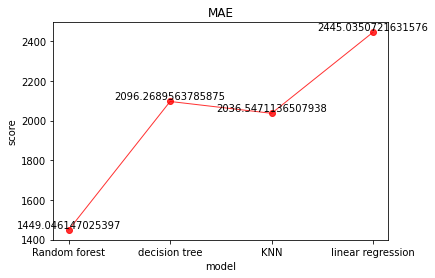

In [317]:
plt.title('MAE')  
plt.xlabel('model')  
plt.ylabel('score')
plt.plot(model, MAE_performance, 'ro-', alpha=0.8, linewidth=1)
for a, b in zip(model, MAE_performance):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=10)

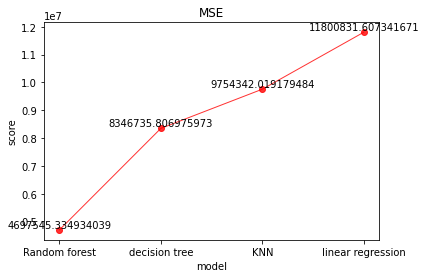

In [318]:
plt.title('MSE')  
plt.xlabel('model')  
plt.ylabel('score')
plt.plot(model, MSE_performance, 'ro-', alpha=0.8, linewidth=1)
for a, b in zip(model, MSE_performance):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=10)

R2 score of Random Forest model is closer to 1 than other three models'.MAE Score and MSE score of Random Forset is lower than others.R-squared represents the proportion of the variance in the dependent variable which is explained by the linear regression model.The lower value of MAE and MSE implies higher accuracy of a regression model. So I think Random Forest have a better result on this dataset.